## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## Understanding the data

In [2]:
data = pd.read_csv(r'C:\Users\49179\Desktop\Machine Learning Projects\Student Performance prediction\Data\StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
data.shape

(1000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Checking Missing values

In [26]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### tyeps of data

In [12]:
numerical_data = [cols for cols in data.columns if data[cols].dtypes != 'O']
categorical_data = [cols for cols in data.columns if data[cols].dtypes == 'O']

In [30]:
categorical_data

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

### Cheking the number of unique values

In [34]:
for i in categorical_data:
    print(f"'{i}'= {len(data[i].unique())} uniques\ncategories = {data[i].unique()}")

'gender'= 2 uniques
categories = ['female' 'male']
'race/ethnicity'= 5 uniques
categories = ['group B' 'group C' 'group A' 'group D' 'group E']
'parental level of education'= 6 uniques
categories = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
'lunch'= 2 uniques
categories = ['standard' 'free/reduced']
'test preparation course'= 2 uniques
categories = ['none' 'completed']


### Analyzing Numerical data

In [31]:
numerical_data

['math score', 'reading score', 'writing score']

In [32]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Data Exploration

In [35]:
data['total'] = data['reading score'] + data['writing score'] + data['math score']
data['average_score'] = data['total']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [54]:
#Checking the amount of students who got full marks
for i in numerical_data:
    print(f"{data[data[i] == 100]['average_score'].count()} students scored full in {i}")


7 students scored full in math score
17 students scored full in reading score
14 students scored full in writing score


In [128]:
#Checking the amount of students who got less marks
for i in numerical_data:
    print(f"{data[data[i] <= 28]['average_score'].count()} students scored less than 28 in {i}")

11 students scored less than 28 in math score
6 students scored less than 28 in reading score
9 students scored less than 28 in writing score


* We can say that students have performed well in reading but they are week in maths

#### Visualizing the data

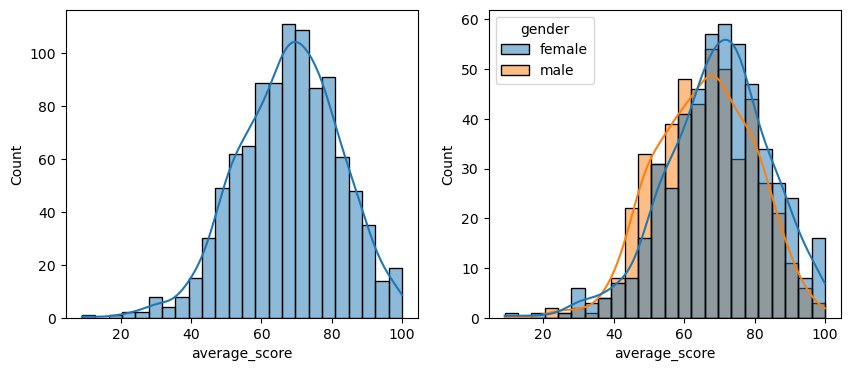

In [64]:
# Visulaizing average score based on gender
fig, axs = plt.subplots(1,2,figsize = (10,4))
plt.subplot(121)
sns.histplot(data=data, kde= True, x= 'average_score')
plt.subplot(122)
sns.histplot(data=data, kde= True, x= 'average_score', hue='gender')
plt.show()

* It seems like female students are likely to get higher average than the male students.

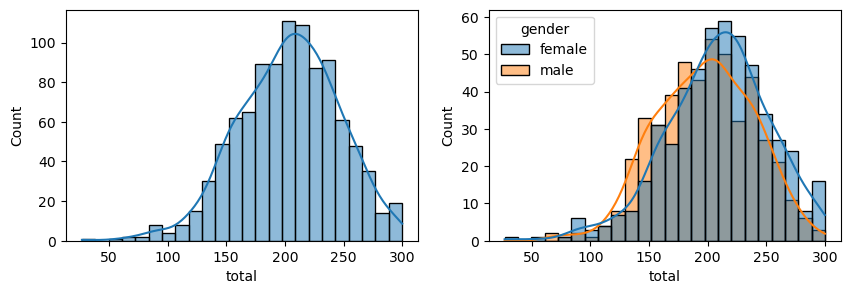

In [67]:
# Visualizing the total score based on gender
fig, axs = plt.subplots(1,2,figsize = (10,3))
plt.subplot(121)
sns.histplot(data=data, kde= True, x= 'total')
plt.subplot(122)
sns.histplot(data=data, kde= True, x= 'total', hue='gender')
plt.show()

* The results are same as the average score. Female students have higher total score.

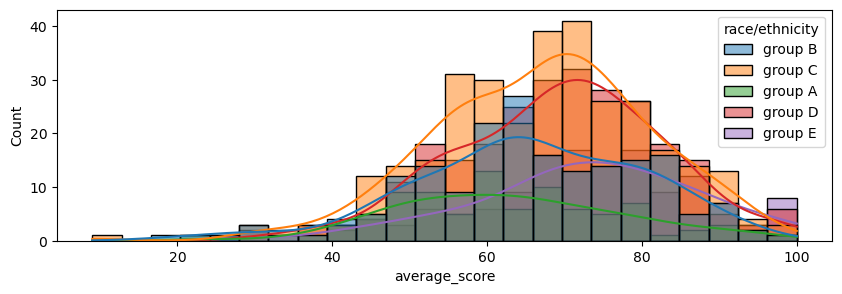

In [71]:
# Visualizing the Average score based on their ethnicity.
plt.figure(figsize = (10,3))
sns.histplot(data=data, kde= True, x= 'average_score',hue = 'race/ethnicity')
plt.show()


* The number of students who belong from Group C and Group D are more who achieved relatively good average score. 

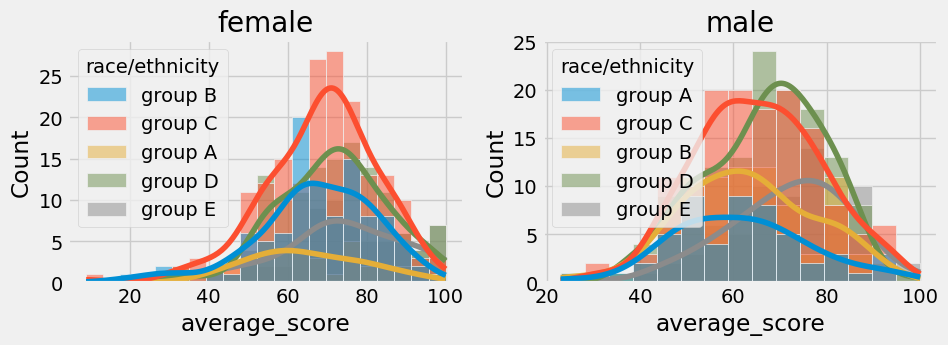

In [130]:
# Visualizing average score based on genders and their race
fig, axs = plt.subplots(1,2,figsize = (10,3))
plt.subplot(121)
plt.title('female')
sns.histplot(data=data[data['gender'] == "female"], kde= True, x= 'average_score', hue='race/ethnicity')
plt.subplot(122)
plt.title('male')
sns.histplot(data=data[data['gender'] == "male"], kde= True, x= 'average_score', hue='race/ethnicity')
plt.show()

* Females from group C and has more students whose average score better than any other race or groups, while males from group D has higher average score than the males in other groups.

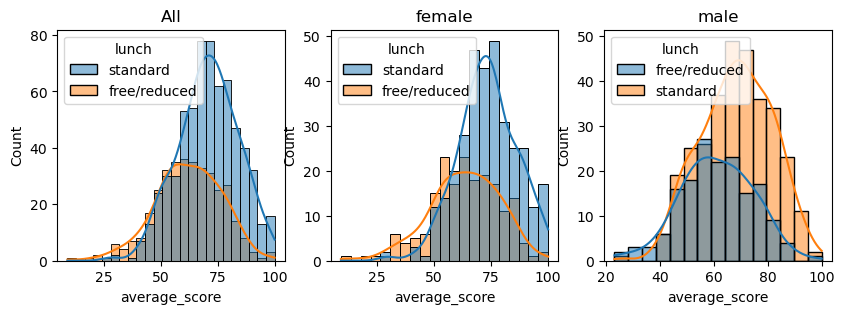

In [83]:
# Visualizing average score based on lunch they get.
fig, axs = plt.subplots(1,3,figsize = (10,3))
plt.subplot(131)
plt.title('All')
sns.histplot(data=data, kde= True, x= 'average_score', hue='lunch')
plt.subplot(132)
plt.title('female')
sns.histplot(data=data[data['gender'] == "female"], kde= True, x= 'average_score', hue='lunch')
plt.subplot(133)
plt.title('male')
sns.histplot(data=data[data['gender'] == "male"], kde= True, x= 'average_score', hue='lunch')
plt.show()

* In all the cases,students who gets the standard lunch wheter they are male or female, achieved more than 70% of the average score.

<Axes: xlabel='average_score', ylabel='Count'>

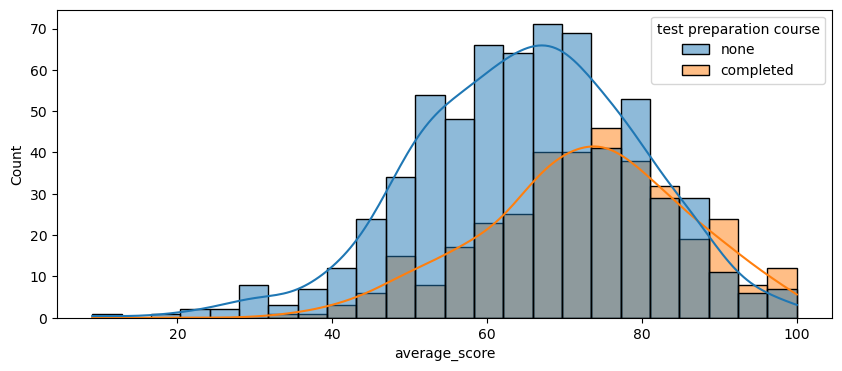

In [105]:
plt.figure(figsize=(10,4))
sns.histplot(data=data, kde= True, x= 'average_score', hue='test preparation course')


* students who have completed the test preparation course have slightly higher average score than the students who haven't.

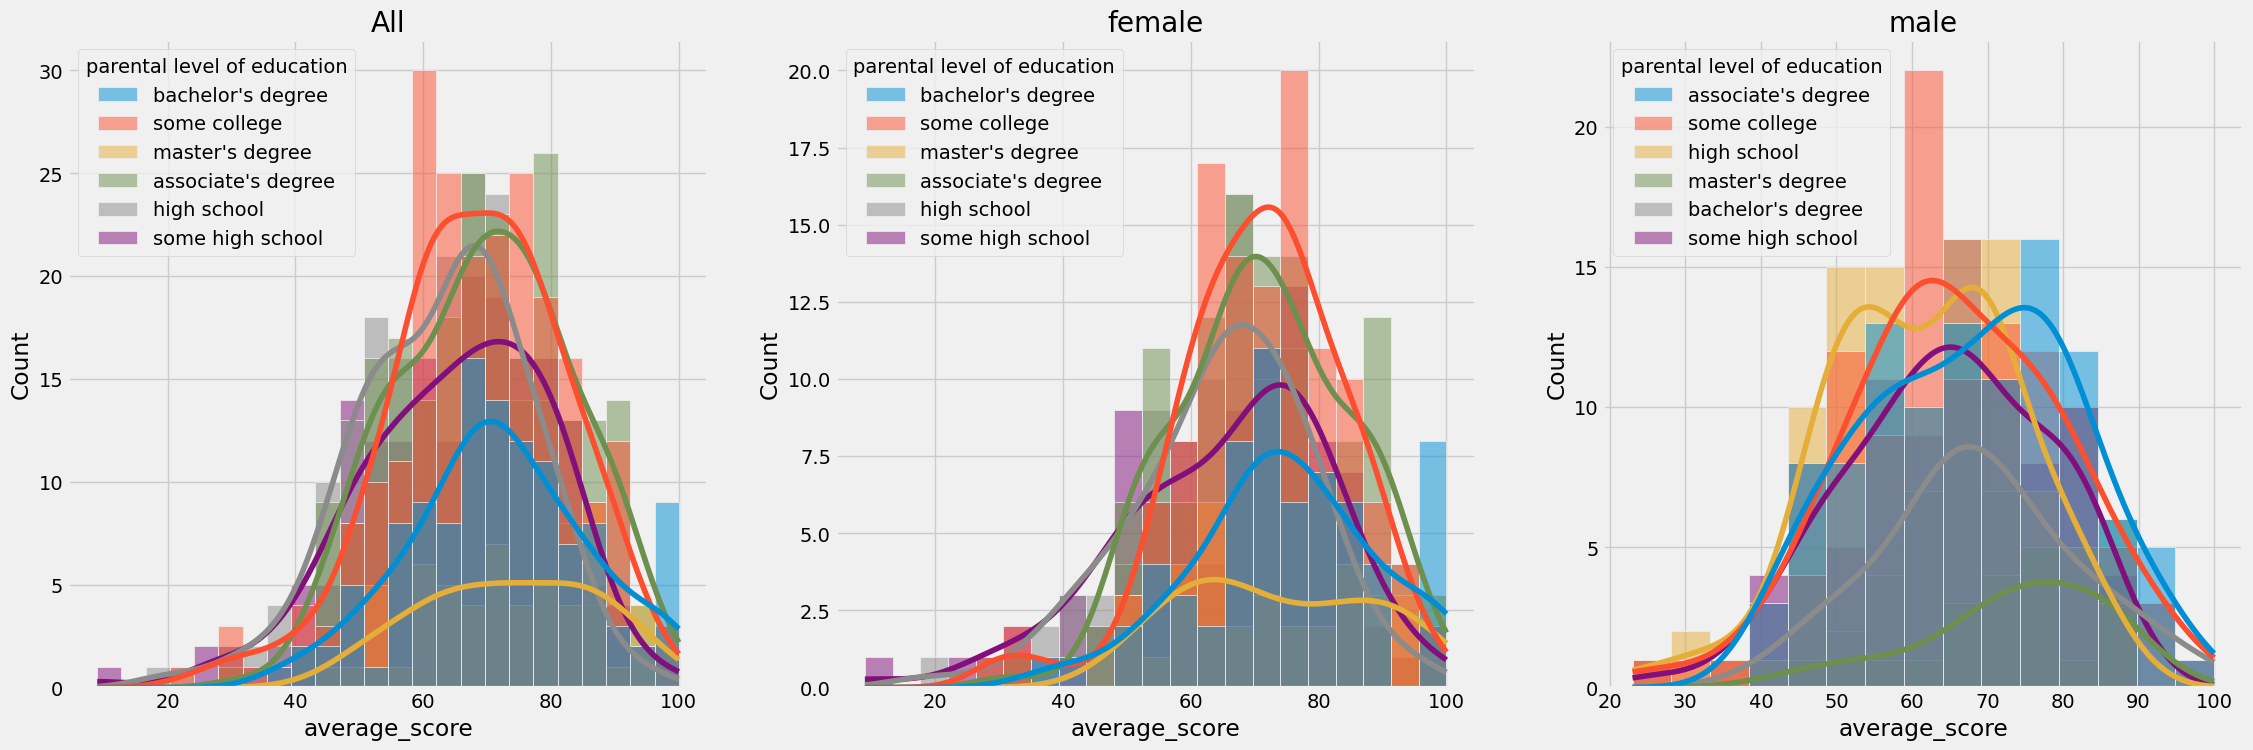

In [141]:
# Visualizing students average score based on their parents education
fig, axs = plt.subplots(1,3,figsize = (25,8))
plt.subplot(131)
plt.title('All')
sns.histplot(data=data, kde= True, x= 'average_score', hue='parental level of education')

plt.subplot(132)
plt.title('female')
sns.histplot(data=data[data['gender'] == "female"], kde= True, x= 'average_score', hue='parental level of education')

plt.subplot(133)
plt.title('male')
sns.histplot(data=data[data['gender'] == "male"], kde= True, x= 'average_score', hue='parental level of education')

plt.show()

* Students whose parents went to some college is shown to get good marks. The parents of students who have completed the master's degree, are more likely to give more attention on their child because they have achived good score. 

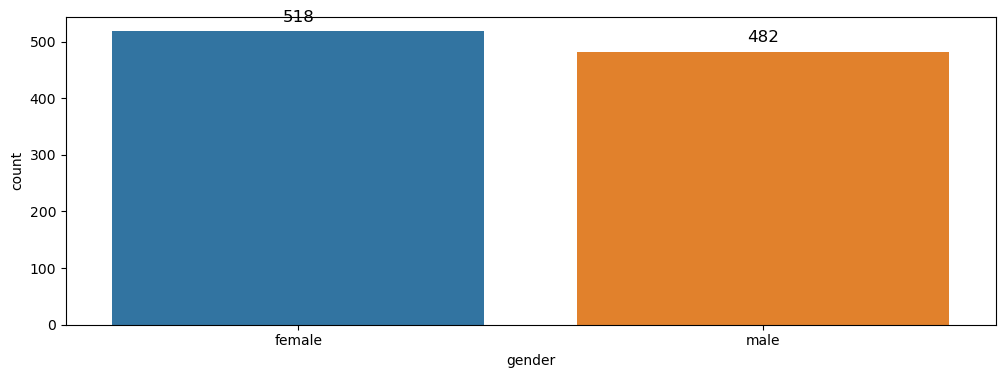

In [100]:
# Univariate Analysis on gender attribute.
plt.figure(figsize=(12,4))
axs = sns.countplot(data=data, x= data['gender'])
for p in axs.patches:
    axs.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=12)


* From the total number of students there are 51.8% of females and 48.2% females.

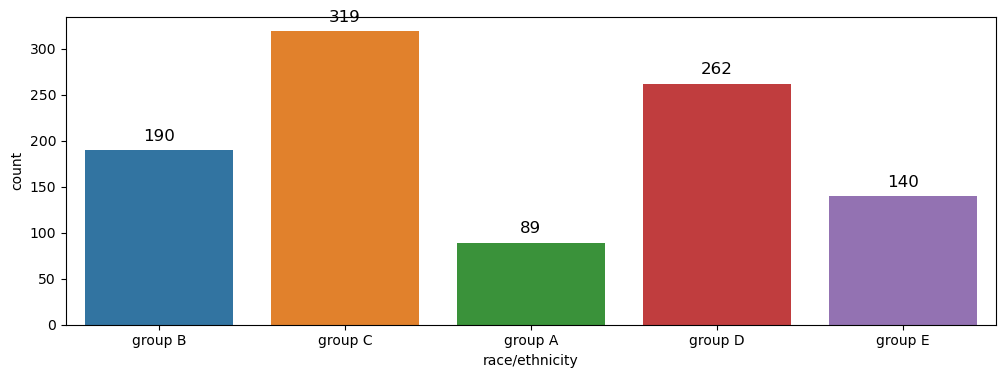

In [107]:
#Univariate analysis of race attribute
plt.figure(figsize=(12,4))
axs = sns.countplot(data=data, x= data['race/ethnicity'])
for p in axs.patches:
    axs.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=12) 

* There are more number of student who belong from group C followed by group D.

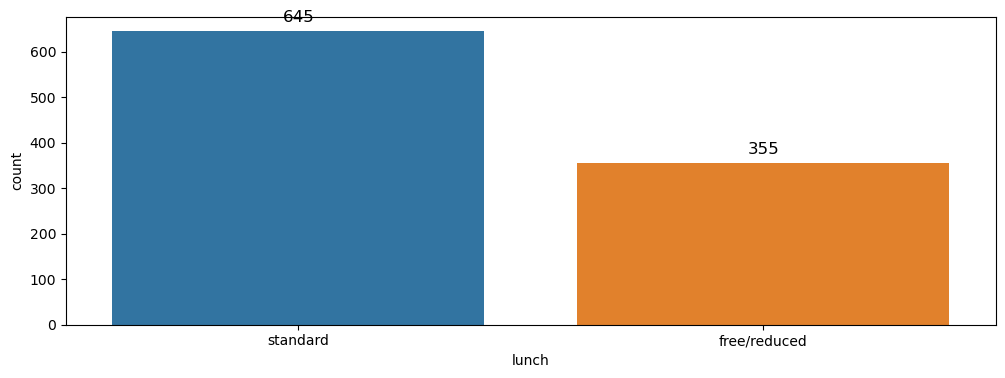

In [109]:
#Univariate Analysys on Lunch attribute
plt.figure(figsize=(12,4))
axs = sns.countplot(data=data, x= data['lunch'])
for p in axs.patches:
    axs.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=12)

* 645 students are having standard lunch.

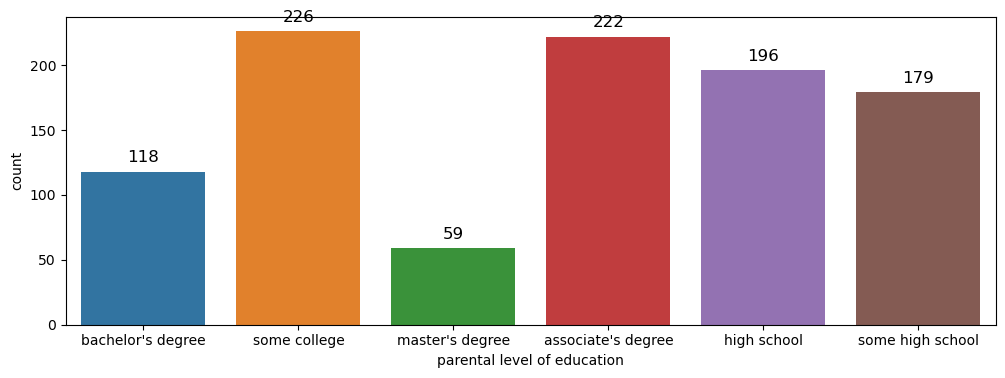

In [110]:
# Univariate Analysis of Parental level of education
plt.figure(figsize=(12,4))
axs = sns.countplot(data=data, x= data['parental level of education'])
for p in axs.patches:
    axs.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=12)

* The majority of student's parents have attended some college and had an associate's degree

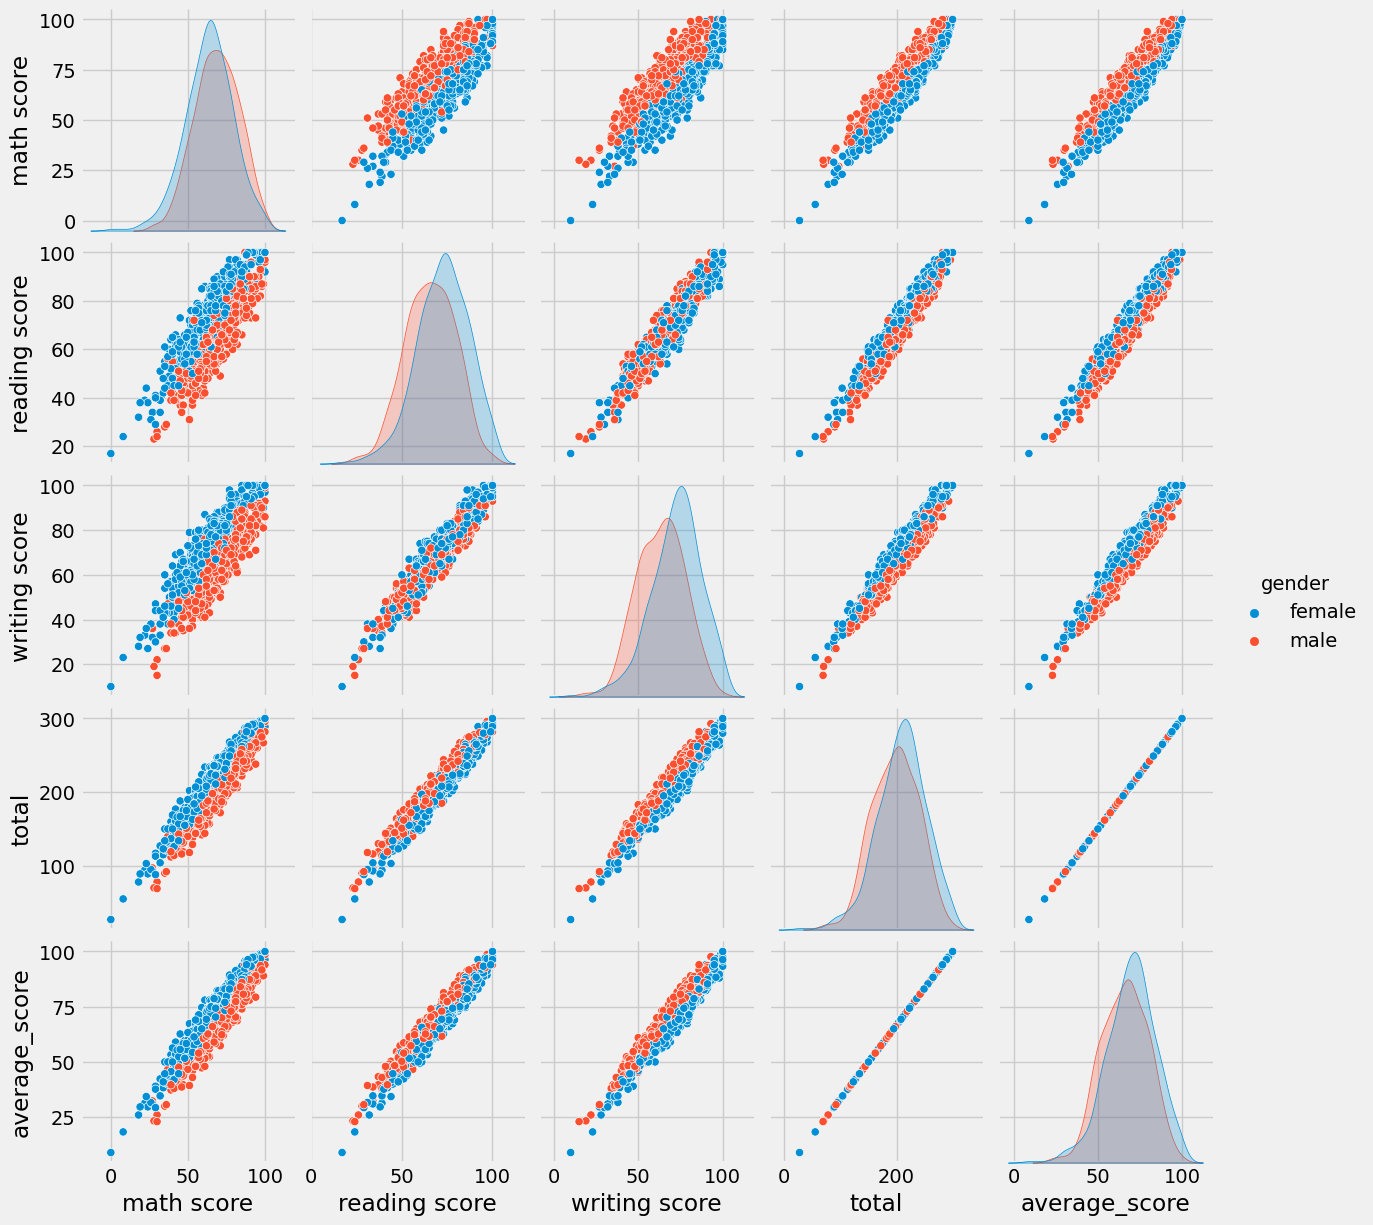

In [142]:
#Multivariate analysis
sns.pairplot(data,hue = 'gender')


* We can see from the above graph that these attributes are Linear in nature with each other.